In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [303]:
# only for visualization
from scipy.stats import multivariate_normal


def visualize(means, covariances, mixture_weights, np_array):
    # Visualization
    x = np.linspace(-5, 10, 500)
    y = np.linspace(-5, 10, 500)
    X_mesh, Y_mesh = np.meshgrid(x, y)
    pos = np.empty(X_mesh.shape + (2,))
    pos[:, :, 0] = X_mesh
    pos[:, :, 1] = Y_mesh
    plt.figure(figsize=(10, 6))
    plt.scatter(np_array[:, 0], np_array[:, 1], s=10, alpha=0.5)
    
    # for k in range(len(means)):
    #     rv = mixture_weights[k] * multivariate_normal.pdf(pos, means[k], covariances[k])
    #     plt.contour(X_mesh, Y_mesh, rv, extend='min', colors='green', alpha=0.5)

    plt.scatter(means[:, 0], means[:, 1], marker='o', c='red', edgecolor='black', s=100, label='Means')
    plt.title('Gaussian Mixture Model')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# EM Algorithm implementation (GMM - Gaussian Mixture Models)

In [304]:
class GaussianMixtureModel:
    def __init__(self, n_components=2, max_iters=1000, tol=1e-20):
        # number of clusters
        self.n_components = n_components
        # maximum number of iterations
        self.max_iters = max_iters
        # threshold for convergence
        self.tol = tol
        self.means = None
        self.covariances = None
        self.mixture_weights = None

    def fit(self, X):
        n_samples, n_features = X.shape

        # Step 1: Initialize model parameters
        # Randomly initialize means
        # Randomly initialize covariances
        # Randomly initialize mixture weights
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        print(self.means)
        self.covariances = np.array([np.eye(n_features)] * self.n_components)
        print(self.covariances)
        self.mixture_weights = np.full(self.n_components, 1 / self.n_components)
        
        #visualize(self.means, self.covariances, self.mixture_weights, X)

        # EM algorithm
        for _ in range(self.max_iters):
            # Step 2: E-step
            responsibilities, class_responsibilities = self._expectation(X)

            # Step 3: M-step
            self._maximization(X, responsibilities, class_responsibilities)
            
            print(self.means)
            print(self.covariances)
            # Check for convergence
            if self._check_convergence(X, responsibilities):
                break

    def _expectation(self, X):        
        responsibilities = np.zeros((X.shape[0], self.n_components))
        
        for i in range(X.shape[0]):
            for j in range(self.n_components):
                responsibilities[i][j] =    self.mixture_weights[j] + self._multivariate_gaussian(X[i], self.means[j], self.covariances[j])
        
        responsibilities /= np.linalg.norm(responsibilities, axis=1, ord = 1, keepdims=True)
        class_responsibilities = np.sum(responsibilities, axis=0)

        return responsibilities, class_responsibilities
    
    def _multivariate_gaussian(self, x, mean, cov):
        return (1 / (np.sqrt((2 * np.pi) * np.linalg.det(cov)))) * np.exp(-0.5 * (x - mean).T @ np.linalg.inv(cov) @ (x - mean))
    
    def _maximization(self, X, responsibilities, class_responsibilities):
        for c in range(self.n_components):
            self.mixture_weights[c] = class_responsibilities[c] / X.shape[0]
            self.means[c] = np.sum(X * responsibilities[:, c].reshape(-1, 1), axis=0) / class_responsibilities[c]
            # self.covariances[c] = np.sum((X - self.means[c]) ** 2 * responsibilities[:, c].reshape(-1, 1), axis=0) / class_responsibilities[c]
            self.covariances[c] = np.cov(X.T, aweights=(responsibilities[:, c]/class_responsibilities[c]).flatten(), ddof=0, bias=True)


    def _check_convergence(self, X, responsibilities):
        # Check for convergence based on the change in log-likelihood
        log_likelihood = np.sum(np.log(np.sum(responsibilities, axis=1)))
        if hasattr(self, 'prev_log_likelihood') and np.abs(log_likelihood - self.prev_log_likelihood) < self.tol:
            print(log_likelihood)
            print(self.prev_log_likelihood)
            return True
        else:
            self.prev_log_likelihood = log_likelihood
            return False


In [305]:
# Read the data
df = pd.read_csv('Dataset for PRML PA2/Dataset4/A2Q3.csv')
# get the data into numpy array
np_array = df.values

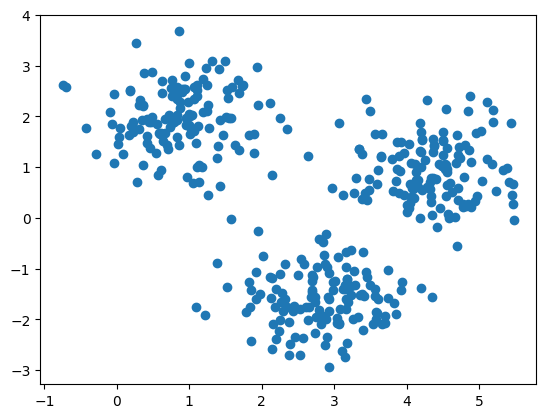

In [306]:
#plot the data
plt.scatter(np_array[:,0],np_array[:,1])

# Visual Analysis

From the scatter plot we can see that the data points seems to form three different clusters.

In [307]:
# Create and fit GMM
gmm = GaussianMixtureModel(n_components=50)
gmm.fit(np_array)

# Get estimated model parameters
print("Means:", gmm.means)
print("Covariances:", gmm.covariances)
print("Mixture Weights:", gmm.mixture_weights)
visualize(gmm.means, gmm.covariances, gmm.mixture_weights, np_array)

[[ 2.89112501 -0.32015   ]
 [ 4.05775751  0.40960232]
 [ 5.41334556  0.71517795]
 [ 2.743644   -1.94470001]
 [ 4.56078645  0.95936074]
 [ 0.01456266  1.46396108]
 [ 3.29818504  0.7908623 ]
 [ 3.85531444  0.72809869]
 [ 1.38981236  1.42249044]
 [ 4.08805543  0.57279381]
 [ 2.68658841 -1.41654872]
 [ 3.11530945  0.44359863]
 [ 0.16921722  1.64256495]
 [ 1.09019643 -1.76233741]
 [ 3.26801777  0.48838231]
 [ 1.57068927 -0.02858378]
 [ 4.50399192  1.24258802]
 [ 4.33748653  0.78933856]
 [ 3.37692467  0.37614087]
 [ 0.71028831  1.36085437]
 [ 3.60293123  0.95270039]
 [ 1.19396573  2.08496451]
 [ 0.66309163  1.66382237]
 [ 3.14542358 -1.31583595]
 [ 4.41705449 -0.1854978 ]
 [ 4.79788982  1.43934441]
 [ 2.65158061 -1.75769127]
 [ 1.24699841  2.61297059]
 [ 3.45177657  0.3471383 ]
 [ 3.16827355 -2.45716162]
 [ 4.78526116  0.81546806]
 [ 0.83328049  2.01829168]
 [ 0.03498878  1.59678117]
 [ 1.89339414  1.64486098]
 [ 4.19147702  1.00372519]
 [ 0.68769764  1.43730635]
 [ 1.21714956 -1.92078222]
 

/tmp/ipykernel_6039/717494385.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  return (1 / (np.sqrt((2 * np.pi) * np.linalg.det(cov)))) * np.exp(-0.5 * (x - mean).T @ np.linalg.inv(cov) @ (x - mean))


LinAlgError: Singular matrix

In [ ]:
# # running for various values of k
# for i in range(2, 399):
#     gmm = GaussianMixtureModel(n_components=i)
#     gmm.fit(np_array)
#     print("Means:", gmm.means)
#     print("Covariances:", gmm.covariances)
#     print("Mixture Weights:", gmm.mixture_weights)
#     visualize(gmm.means, gmm.covariances, gmm.mixture_weights)

[[ 0.98414244  1.81751494]
 [ 3.58156464 -1.57324715]
 [ 4.37898471  1.42330856]
 [ 2.37851697 -2.04228745]
 [ 4.33495456  0.43189106]
 [ 0.89992619  2.47434181]
 [ 2.13006755 -1.17412329]
 [ 3.60293123  0.95270039]
 [ 0.08963316  1.25471244]
 [ 1.85644202  1.6424493 ]
 [ 3.04478047 -0.76785731]
 [ 5.46996004  0.27239604]
 [ 1.41609504  0.63351538]
 [ 5.1057041   2.27421165]
 [-0.72092522  2.59696015]
 [-0.0963654   2.07844585]
 [ 2.73490408 -2.25766712]
 [ 4.54740374  0.94658583]
 [ 3.06179631  1.87296081]
 [ 0.41748248  1.95010284]
 [ 2.70525422 -1.56172083]
 [ 1.30836432  3.09490023]
 [ 3.17638374 -1.20519687]
 [ 1.67647684  2.71543812]
 [ 1.78713075 -1.8543312 ]
 [ 3.41435062  0.36163958]
 [ 0.69899298  1.39908036]
 [ 4.93645836  0.33381851]
 [ 5.17635143  1.06269622]
 [ 3.1000446  -2.62145801]
 [ 0.18581598  2.51139991]
 [ 1.54462524  1.97922914]
 [ 1.57068927 -0.02858378]
 [ 3.0358167  -1.96433081]
 [ 3.65582842  1.65225163]
 [ 2.69412193 -1.14700185]
 [ 2.3855737  -2.48800564]
 

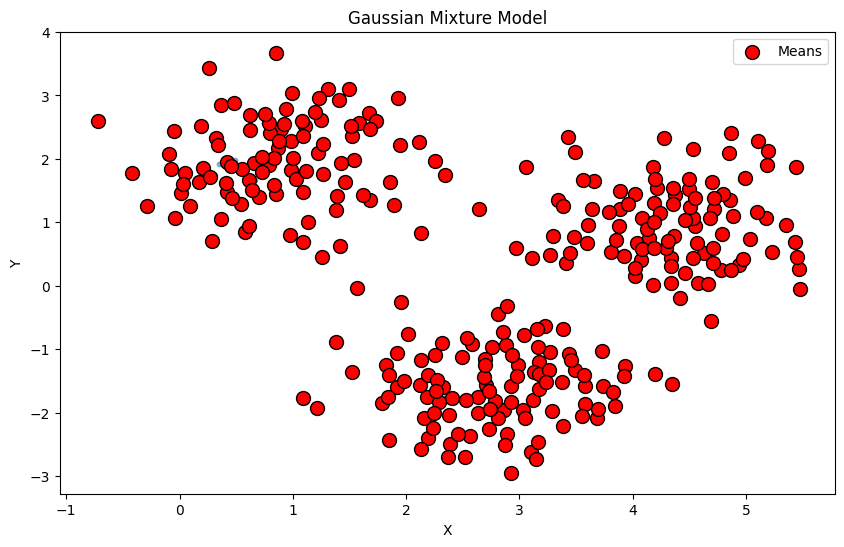

In [ ]:
import sklearn.mixture as mixture

gm = mixture.GaussianMixture(n_components=300, covariance_type='full')
gm.fit(np_array)
print(gm.means_)
print(gm.covariances_)
print(gm.weights_)
visualize(gm.means_, gm.covariances_, gm.weights_, np_array)